In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from keras import regularizers
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
Test_dir = "D:\dataset\Dataset\TEST"
Train_dir = "D:\dataset\Dataset\TRAIN"
Validation_dir = "D:\dataset\Dataset\VALIDATION"

batch_size = 32
target_size = (180, 180)

In [3]:
Test_datagen = ImageDataGenerator(
    rescale=1./255
)

Test_generator = Test_datagen.flow_from_directory(
    Test_dir,
    batch_size=batch_size,
    target_size=target_size
)


Validation_datagen = ImageDataGenerator(
    rescale=1./255
)

Validation_generator = Validation_datagen.flow_from_directory(
    Validation_dir,
    batch_size=batch_size,
    target_size=target_size
)


Train_datagen = ImageDataGenerator(
    zoom_range=0.1,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,   
    
)

Train_generator = Train_datagen.flow_from_directory(
    Train_dir,
    batch_size=batch_size,
    target_size=target_size, 
    shuffle=True
)

Found 2144 images belonging to 3 classes.
Found 4550 images belonging to 3 classes.
Found 2288 images belonging to 3 classes.


In [4]:
def view_images(target_dir, target_class, num_images, rows, cols, target_size):
    target_folder = os.path.join(target_dir, target_class)
    all_images = os.listdir(target_folder)
    random_images = random.sample(all_images, num_images)

    plt.figure(figsize=(18, 10))

    for i, image_name in enumerate(random_images, start=1):
        img_path = os.path.join(target_folder, image_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (target_size, target_size))  

        plt.subplot(rows, cols, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
        plt.title(target_class)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

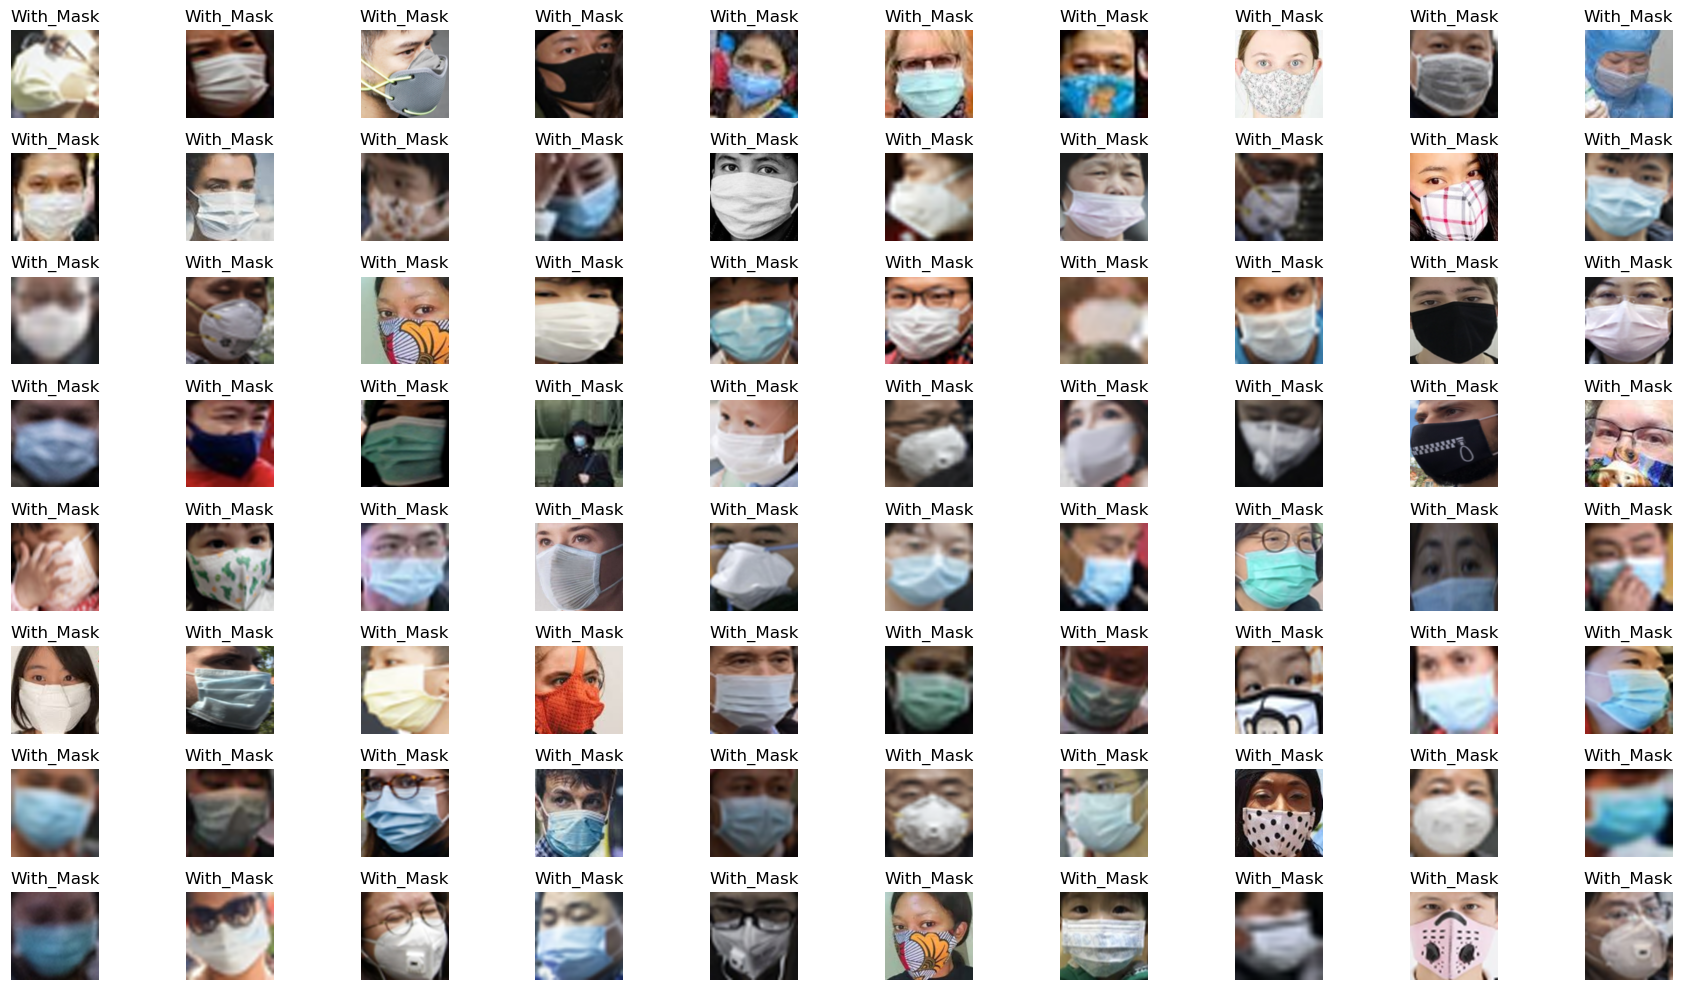

In [5]:
view_images(Train_dir, "With_Mask", num_images=80, rows=8, cols=10, target_size=180)

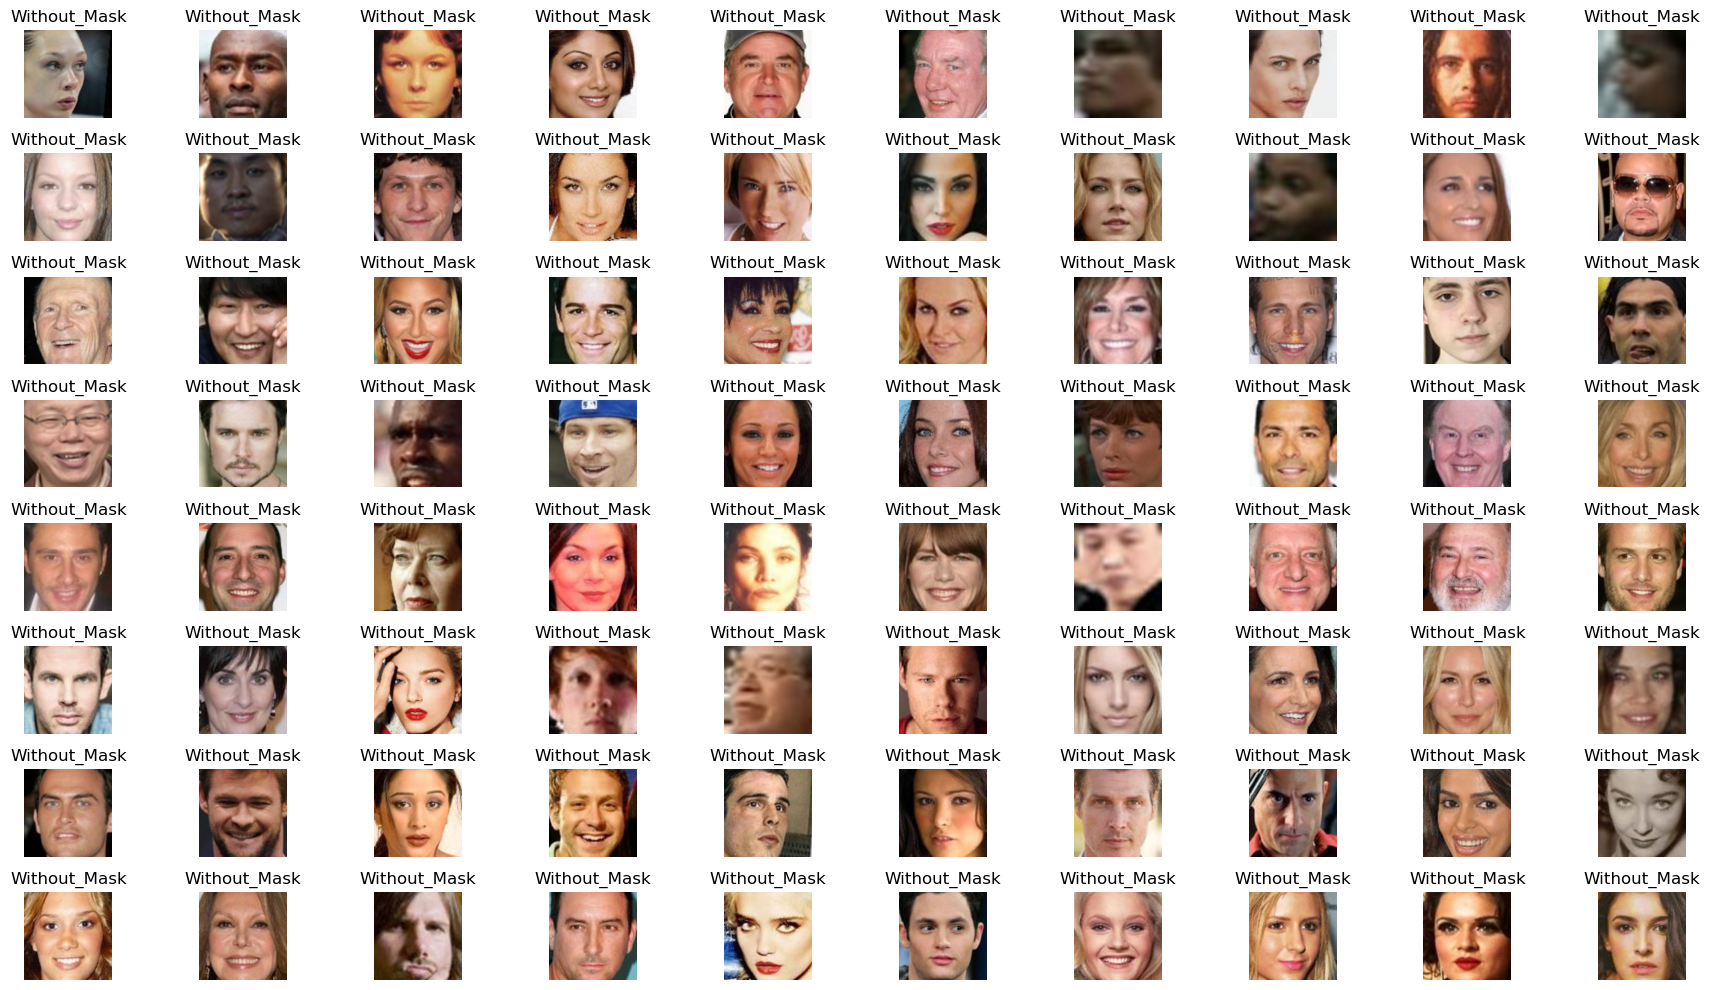

In [7]:
view_images(Train_dir, "Without_Mask", num_images=80, rows=8, cols=10, target_size=180)

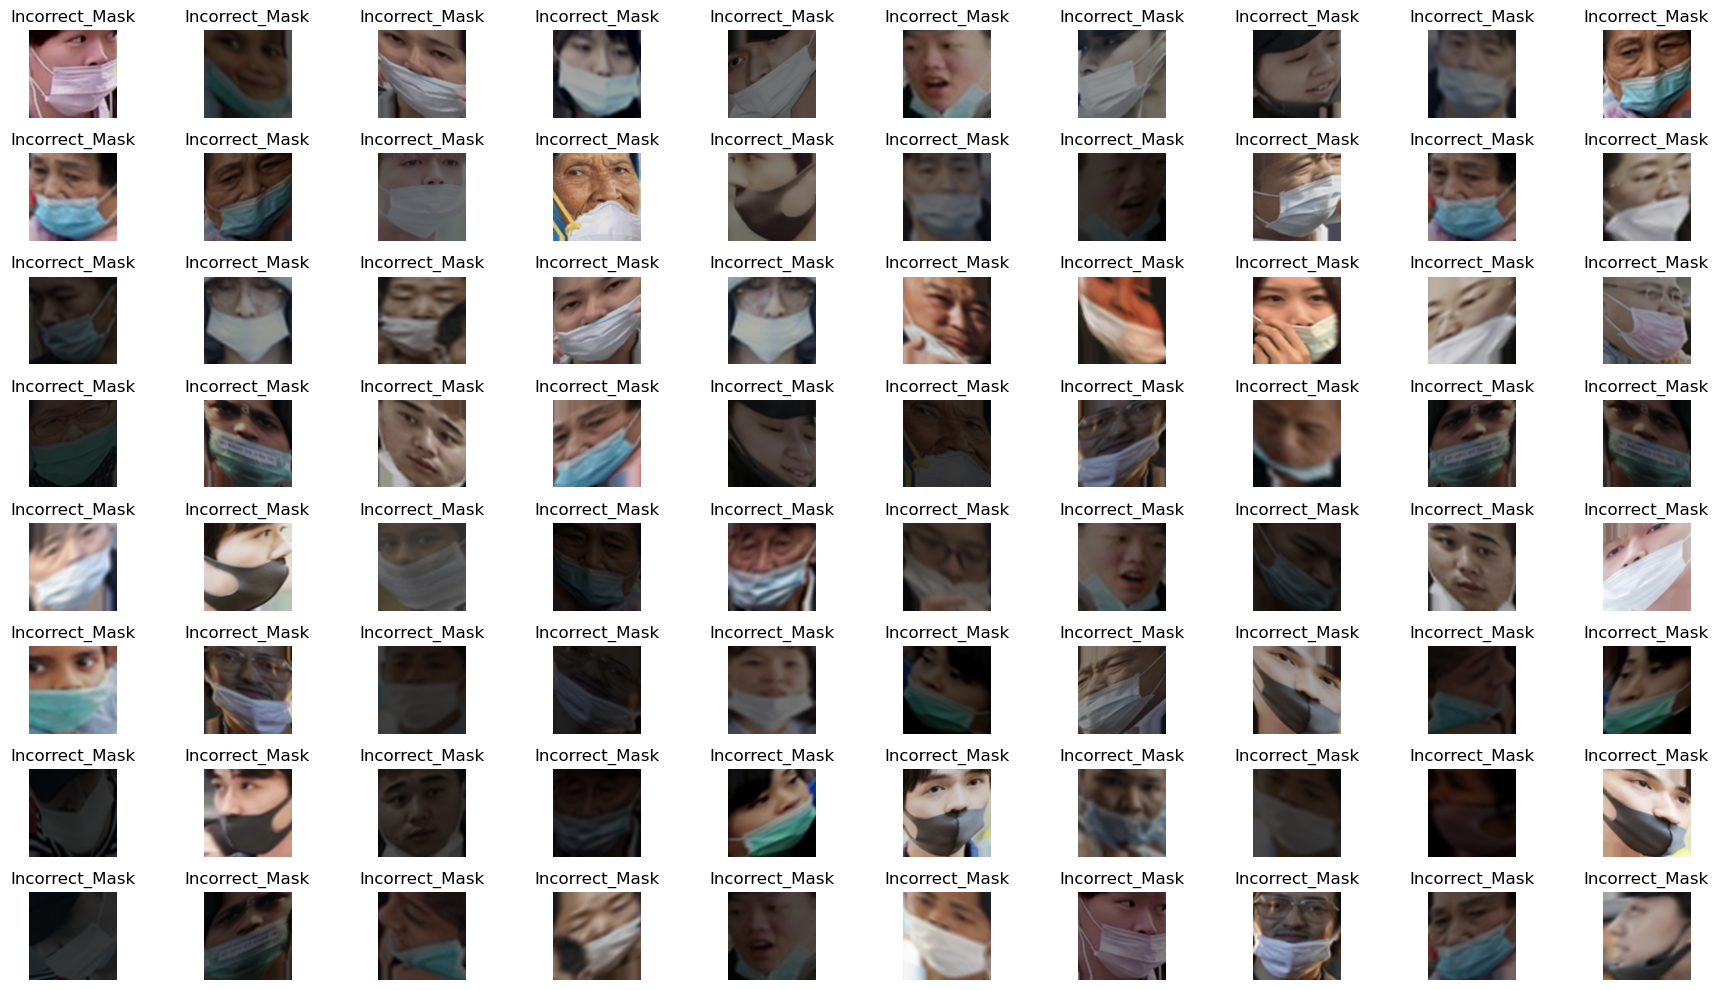

In [8]:
view_images(Train_dir, "Incorrect_Mask", num_images=80, rows=8, cols=10, target_size=180)

In [9]:
Train_data = []
Train_labels = []

With_Mask_dir = os.path.join(Train_dir, "With_Mask")
Without_Mask_dir = os.path.join(Train_dir, "Without_Mask")
Incorrect_Mask_dir = os.path.join(Train_dir, "Incorrect_Mask")

    
for a in os.listdir(With_Mask_dir):
    image = cv2.imread(os.path.join(With_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Train_data.append(image)
    Train_labels.append(0)  


for a in os.listdir(Without_Mask_dir):
    image = cv2.imread(os.path.join(Without_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Train_data.append(image)
    Train_labels.append(1)  
    
for a in os.listdir(Incorrect_Mask_dir):
    image = cv2.imread(os.path.join(Incorrect_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Train_data.append(image)
    Train_labels.append(2)      

In [10]:
Test_data = []
Test_labels = []

With_Mask_dir = os.path.join(Test_dir, "With_Mask")
Without_Mask_dir = os.path.join(Test_dir, "Without_Mask")
Incorrect_Mask_dir = os.path.join(Test_dir, "Incorrect_Mask")

    
for a in os.listdir(With_Mask_dir):
    image = cv2.imread(os.path.join(With_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Test_data.append(image)
    Test_labels.append(0)  


for a in os.listdir(Without_Mask_dir):
    image = cv2.imread(os.path.join(Without_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Test_data.append(image)
    Test_labels.append(1)  
    
for a in os.listdir(Incorrect_Mask_dir):
    image = cv2.imread(os.path.join(Incorrect_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Test_data.append(image)
    Test_labels.append(2)  

In [11]:
Validation_data = []
Validation_labels = []

With_Mask_dir = os.path.join(Validation_dir, "With_Mask")
Without_Mask_dir = os.path.join(Validation_dir, "Without_Mask")
Incorrect_Mask_dir = os.path.join(Validation_dir, "Incorrect_Mask")

    
for a in os.listdir(With_Mask_dir):
    image = cv2.imread(os.path.join(With_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Validation_data.append(image)
    Validation_labels.append(0)  


for a in os.listdir(Without_Mask_dir):
    image = cv2.imread(os.path.join(Without_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Validation_data.append(image)
    Validation_labels.append(1)  
    
for a in os.listdir(Incorrect_Mask_dir):
    image = cv2.imread(os.path.join(Incorrect_Mask_dir, a))
    image = cv2.resize(image, (224, 224))
    Validation_data.append(image)
    Validation_labels.append(2)    

In [12]:
Train_data = np.array(Train_data) 
Train_labels = np.array(Train_labels)

Test_data = np.array(Test_data)
Test_labels = np.array(Test_labels)

Validation_data = np.array(Validation_data) 
Validation_labels = np.array(Validation_labels)

print(f"Train Data Shape: {Train_data.shape}")
print(f"Train Label Shape: {Train_labels.shape}")

print(f"Test Data Shape : {Test_data.shape}")
print(f"Test Label Shape: {Test_labels.shape}")

print(f"Validation Data Shape : {Validation_data.shape}")
print(f"Validation Label Shape: {Validation_labels.shape}")

Train Data Shape: (2288, 224, 224, 3)
Train Label Shape: (2288,)
Test Data Shape : (2144, 224, 224, 3)
Test Label Shape: (2144,)
Validation Data Shape : (4550, 224, 224, 3)
Validation Label Shape: (4550,)


In [13]:
classes = 3 

base_model = tf.keras.applications.MobileNet(weights = "imagenet",input_shape = [224,224,3],include_top = False )

base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=256, activation="relu")(x)
x = Dense(units=64, activation="relu")(x)

prediction_layer = Dense(units=classes, activation="softmax")(x)  

model = Model(inputs=base_model.input, outputs=prediction_layer)


adam_lr = 0.00001
beta1 = 0.99
beta2 = 0.99
eps = 1e-9

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1, beta_2=beta2, epsilon=eps)

model.compile(
    optimizer = optimizer_adam, 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [16]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

mobileNet = model.fit(
    Train_data, Train_labels,
    epochs=10,
    validation_data=(Validation_data, Validation_labels),
    batch_size=32
)

Epoch 1/10
72/72 [==============================] - 102s 1s/step - loss: 0.1824 - accuracy: 0.9305 - val_loss: 0.3206 - val_accuracy: 0.8908
Epoch 2/10
72/72 [==============================] - 102s 1s/step - loss: 0.0809 - accuracy: 0.9698 - val_loss: 0.2459 - val_accuracy: 0.9266
Epoch 3/10
72/72 [==============================] - 102s 1s/step - loss: 0.0377 - accuracy: 0.9891 - val_loss: 0.1921 - val_accuracy: 0.9387
Epoch 4/10
72/72 [==============================] - 102s 1s/step - loss: 0.0176 - accuracy: 0.9974 - val_loss: 0.2751 - val_accuracy: 0.9231
Epoch 5/10
72/72 [==============================] - 102s 1s/step - loss: 0.0079 - accuracy: 0.9991 - val_loss: 0.2015 - val_accuracy: 0.9444
Epoch 6/10
72/72 [==============================] - 102s 1s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.2578 - val_accuracy: 0.9369
Epoch 7/10
72/72 [==============================] - 102s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2185 - val_accuracy: 0.9422
Epoch 8/10
72

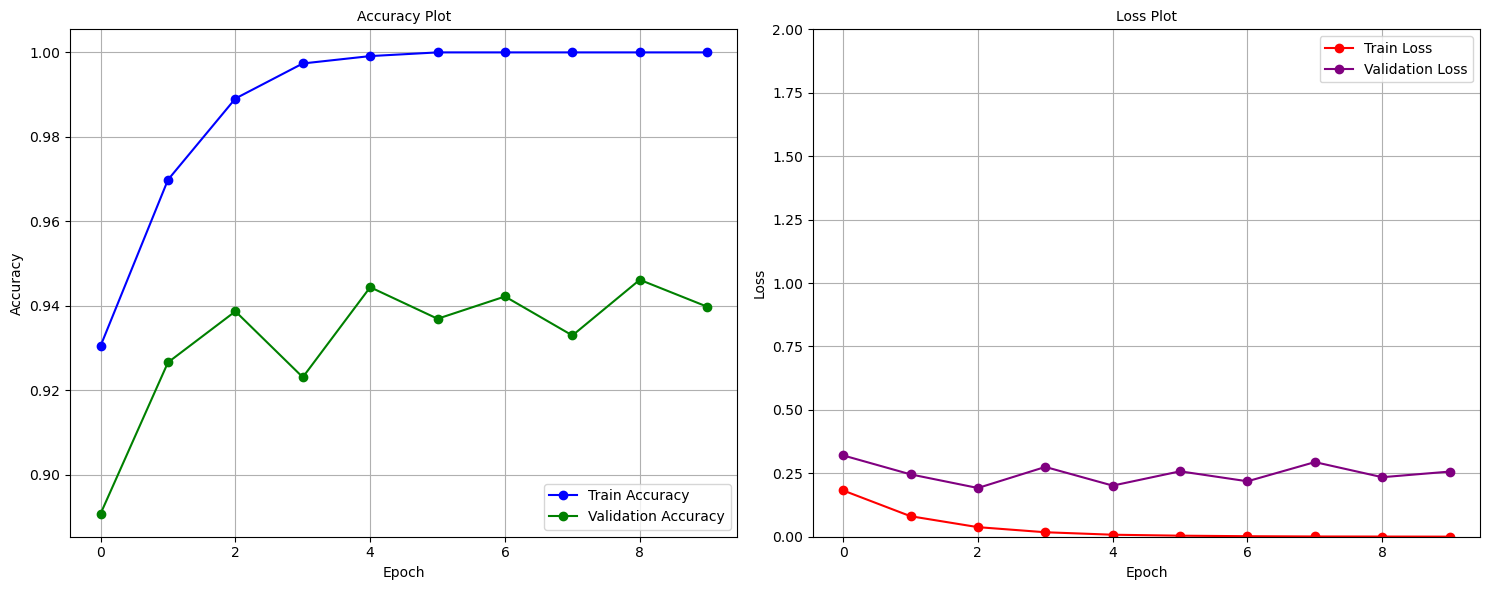

In [17]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
plt.title("Accuracy Plot", size=10)
plt.plot(mobileNet.history['accuracy'], 'o-', label='Train Accuracy',color='blue')
plt.plot(mobileNet.history['val_accuracy'], 'o-', label='Validation Accuracy', color='green')
plt.xlabel('Epoch', size=10)
plt.ylabel('Accuracy', size=10)
plt.grid(True)
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.title("Loss Plot", size=10)
plt.plot(mobileNet.history['loss'], 'o-', label='Train Loss', color='red')
plt.plot(mobileNet.history['val_loss'], 'o-', label='Validation Loss', color='purple')
plt.xlabel('Epoch', size=10)
plt.ylabel('Loss', size=10)
plt.ylim([0, 2])  
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout() 
plt.show()

In [23]:
from tabulate import tabulate


predictions = model.predict(Test_data)
predicted_classes = np.argmax(predictions, axis=1)


accuracy = accuracy_score(Test_labels, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")


confusion = confusion_matrix(Test_labels, predicted_classes)


confusion_df = pd.DataFrame(
    confusion, index = ["With_Mask","Without_Mask","Incorrect_Mask"], 
    columns = ["Predicted With_Mask"," Predicted Without_Mask"," Predicted Incorrect_Mask"]
)


tabulated_confusion = tabulate(
    confusion_df, headers='keys', tablefmt='grid', numalign='center'
)


print("Confusion Matrix:")
print(tabulated_confusion)


class_names = ["With_Mask", "Without_Mask","Incorrect_Mask"]


report = classification_report(Test_labels, predicted_classes, target_names=class_names)


print("\nClassification Report:")
print(report)


67/67 [==============================] - 29s 432ms/step
Accuracy: 0.90
Confusion Matrix:
+----------------+-----------------------+---------------------------+-----------------------------+
|                |  Predicted With_Mask  |   Predicted Without_Mask  |   Predicted Incorrect_Mask  |
+================+=======================+===========================+=============================+
| With_Mask      |          661          |            71             |             100             |
+----------------+-----------------------+---------------------------+-----------------------------+
| Without_Mask   |          19           |            743            |             22              |
+----------------+-----------------------+---------------------------+-----------------------------+
| Incorrect_Mask |           0           |             0             |             528             |
+----------------+-----------------------+---------------------------+-----------------------------+

C